In [100]:
import pandas as pd
import numpy as np
from urllib.request import urlopen
import imageio

import math
import matplotlib.pyplot as plt
from PIL import Image
from scipy import stats

from mplsoccer import PyPizza, add_image, FontManager

In [120]:
df = pd.read_csv('ChampFBWBnew.csv')

In [121]:
df.head()

,Player,Team,Position,Age,Market value,Contract expires,Matches played,Minutes played,Goals,xA,...,Offensive duels per 90,"Offensive duels won, %",Touches in box per 90,Progressive runs per 90,Passes per 90,"Accurate passes, %",xA per 90,Key passes per 90,Progressive passes per 90,"Accurate progressive passes, %"
0,N. Williams,Fulham,RB,21,8000000,30/06/2025,14,1261,2,1.25,...,7.92,44.14,1.07,3.85,59.24,81.08,0.09,0.64,10.35,75.86
1,D. Spence,Nottingham Forest,"RWB, RB",21,8000000,30/06/2024,45,4262,2,4.76,...,11.59,42.08,1.56,4.03,32.56,77.69,0.10,0.49,6.00,67.25
2,A. Robinson,Fulham,LB,24,8000000,30/06/2024,36,3264,2,4.50,...,6.15,44.84,0.97,4.00,57.63,81.20,0.12,0.80,14.01,75.39
3,E. Laird,Bournemouth,"RWB, RB",20,5000000,30/06/2023,26,2161,0,3.19,...,13.33,44.69,2.29,2.75,27.95,78.24,0.13,0.67,3.37,66.67
4,K. Tete,Fulham,RB,26,5000000,30/06/2024,20,1461,2,3.06,...,6.96,46.90,0.99,1.79,59.45,84.87,0.19,0.74,11.70,70.00


In [122]:
#Create new metrics

#Progressive passes
df['Progressive passes'] = df['Accurate progressive passes, %'] /100 * df['Progressive passes per 90']
df = df.round({'Progressive passes': 2})

#Successul dribbles
df['Successful dribbles'] = df['Successful dribbles, %'] /100 * df['Dribbles per 90']
df = df.round({'Successful dribbles': 2})


#Successul crosses
df['Successful crosses'] = df['Accurate crosses, %'] /100 * df['Crosses per 90']
df = df.round({'Successful crosses': 2})

#xA per 100 passes
df['90s'] = df['Minutes played'] /90
df['Successful passes per 90'] = df['Accurate passes, %'] /100 * df['Passes per 90']
df['Completed passes'] =  df['Successful passes per 90'] * df['90s']
df['100 passes'] = df['Completed passes'] / 100
df['xA per 100 passes'] = df['xA'] / df['100 passes']
df = df.round({'xA per 100 passes': 2})


In [123]:
df.head()

,Player,Team,Position,Age,Market value,Contract expires,Matches played,Minutes played,Goals,xA,...,Progressive passes per 90,"Accurate progressive passes, %",Progressive passes,Successful dribbles,Successful crosses,90s,Successful passes per 90,Completed passes,100 passes,xA per 100 passes
0,N. Williams,Fulham,RB,21,8000000,30/06/2025,14,1261,2,1.25,...,10.35,75.86,7.85,2.42,1.64,14.011111,48.031792,672.978775,6.729788,0.19
1,D. Spence,Nottingham Forest,"RWB, RB",21,8000000,30/06/2024,45,4262,2,4.76,...,6.00,67.25,4.04,3.30,0.84,47.355556,25.295864,1197.899693,11.978997,0.40
2,A. Robinson,Fulham,LB,24,8000000,30/06/2024,36,3264,2,4.50,...,14.01,75.39,10.56,1.74,1.76,36.266667,46.795560,1697.118976,16.971190,0.27
3,E. Laird,Bournemouth,"RWB, RB",20,5000000,30/06/2023,26,2161,0,3.19,...,3.37,66.67,2.25,4.00,0.88,24.011111,21.868080,525.076899,5.250769,0.61
4,K. Tete,Fulham,RB,26,5000000,30/06/2024,20,1461,2,3.06,...,11.70,70.00,8.19,1.42,1.85,16.233333,50.455215,819.056324,8.190563,0.37


In [124]:
df = df.drop(['Team','Position','Age','Market value','Contract expires','Matches played','Minutes played','Goals', 'xA', '90s', 'Successful passes per 90', 'Completed passes', '100 passes'],axis=1)



In [125]:
df.head()

,Player,Defensive duels per 90,"Defensive duels won, %",Aerial duels per 90,"Aerial duels won, %",PAdj Interceptions,Crosses per 90,"Accurate crosses, %",Dribbles per 90,"Successful dribbles, %",...,Passes per 90,"Accurate passes, %",xA per 90,Key passes per 90,Progressive passes per 90,"Accurate progressive passes, %",Progressive passes,Successful dribbles,Successful crosses,xA per 100 passes
0,N. Williams,8.42,60.17,2.85,52.50,8.49,5.35,30.67,4.92,49.28,...,59.24,81.08,0.09,0.64,10.35,75.86,7.85,2.42,1.64,0.19
1,D. Spence,5.98,63.96,2.13,50.50,7.46,2.47,34.19,6.17,53.42,...,32.56,77.69,0.10,0.49,6.00,67.25,4.04,3.30,0.84,0.40
2,A. Robinson,6.18,65.63,3.12,48.67,8.38,4.41,40.00,2.87,60.58,...,57.63,81.20,0.12,0.80,14.01,75.39,10.56,1.74,1.76,0.27
3,E. Laird,4.87,62.39,3.87,32.26,4.73,2.75,31.82,7.70,51.89,...,27.95,78.24,0.13,0.67,3.37,66.67,2.25,4.00,0.88,0.61
4,K. Tete,7.08,68.70,3.20,44.23,6.69,3.82,48.39,2.77,51.11,...,59.45,84.87,0.19,0.74,11.70,70.00,8.19,1.42,1.85,0.37


In [126]:
#Metric Name Adjustments
df['Offensive duels'] = df['Offensive duels per 90'] 
df['Touches in box'] = df['Touches in box per 90'] 
df['Progressive runs'] = df['Progressive runs per 90'] 
df['Expected assists'] = df['xA per 90']
df['Key passes'] = df['Key passes per 90'] 
df['Defensive duels'] = df['Defensive duels per 90'] 
df['Aerial duels'] = df['Aerial duels per 90'] 

In [127]:
#Organise metric order for chart

df = df.filter(['Player','Successful crosses','Successful dribbles','Offensive duels','Offensive duels won, %','Touches in box','Progressive runs','Progressive passes','Accurate passes, %','xA per 100 passes','Key passes','Defensive duels','Defensive duels won, %','Aerial duels','Aerial duels won, %','PAdj Interceptions'], axis=1)



In [128]:
#Rename metrics for visual
df.columns = ['Player','Successful Crosses', 'Successful Dribbles', 'Offensive Duels', 'Offensive Duels\nWon %', 'Attacking Box\nTouches', 'Progressive Runs', 'Progressive Passes', 'Pass Completion %', 'xA Per 100\nPasses', 'Key Passes', 'Defensive Duels', 'Defensive Duel\nSuccess %', 'Aerials Duels', 'Aerial Duel\nSuccess %', 'PAdj Interceptions']




In [129]:
#get parameters
params = list(df.columns)
print(params)

['Player', 'Successful Crosses', 'Successful Dribbles', 'Offensive Duels', 'Offensive Duels\nWon %', 'Attacking Box\nTouches', 'Progressive Runs', 'Progressive Passes', 'Pass Completion %', 'xA Per 100\nPasses', 'Key Passes', 'Defensive Duels', 'Defensive Duel\nSuccess %', 'Aerials Duels', 'Aerial Duel\nSuccess %', 'PAdj Interceptions']


In [130]:
#drop the first list team because we don't need player name. Start at first metric
params = params[1:]

In [131]:
df.Player.unique()

array(['N. Williams', 'D. Spence', 'A. Robinson', 'E. Laird', 'K. Tete',
       'D. Furlong', 'H. Wolf', 'I. Maatsen', 'J. Bogle', 'G. Baldock',
       'L. Buchanan', 'J. Stacey', 'C. Drameh', 'M. Lowe', 'J. Zemura',
       "D. O'Shea", 'I. Jones', 'S. McCallum', 'R. Giles', 'J. Bryan',
       'C. Styles', 'R. Nyambe', 'H. Toffolo', 'C. Townsend', 'B. Osborn',
       'A. Reach', 'A. Baba', 'Jay Dasilva', 'J. Bree', 'S. Thomas',
       'J. Bela', 'M. Bola', 'J. Tymon', 'T. Smith', 'J. Bidwell',
       'A. Bell', 'S. Malone', 'R. Norrington-Davies', 'M. Colin',
       'O. Turton', 'E. Stevens', 'A. Smith', "C. O'Dowda", 'N. Byrne',
       'B. Potts', 'A. Yiadom', 'C. Christie', 'R. Vita', 'D. Sterling',
       'C. Connolly', 'F. Dabo', 'F. Onyedinma', 'T. Kane', 'A. Scott',
       'C. Brittain', 'C. Elder', 'J. Earl', 'T. McIntyre', 'J. Husband',
       'M. Odubajo', 'D. Odoi', 'R. Leonard', 'D. McNamara', 'R. James',
       'T. Edun', 'R. Longman', 'T. Gardner-Hickman', 'J. Bagan',
    

In [132]:
#NEW DATA FRAME FOR YOUR PLAYER / EDIT NAME
Player = df.loc[df['Player']=='D. Spence'].reset_index()
Player = list(Player.loc[0])
Player = Player[2:]

In [133]:
#CHECK THESE NUMBERS SHOULD BE THE SAME
print(len(params),len(Player))

15 15


In [134]:
values = []
for x in range(len(params)):
    values.append(math.floor(stats.percentileofscore(df[params[x]],Player[x])))

In [135]:
#Percentile rank rounded values
values

[48, 93, 97, 37, 79, 100, 30, 67, 70, 72, 29, 73, 20, 72, 86]

In [136]:
# color for the slices and text
slice_colors = ["#3e79ad"] * 6 + ["#EF6577"] * 4 + ["#14A2A2"] * 5
text_colors = ["#000000"] * 15

In [137]:
# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#D3D6C7",     # background color
    straight_line_color="#EBEBE9",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=5            # size of inner circle
)

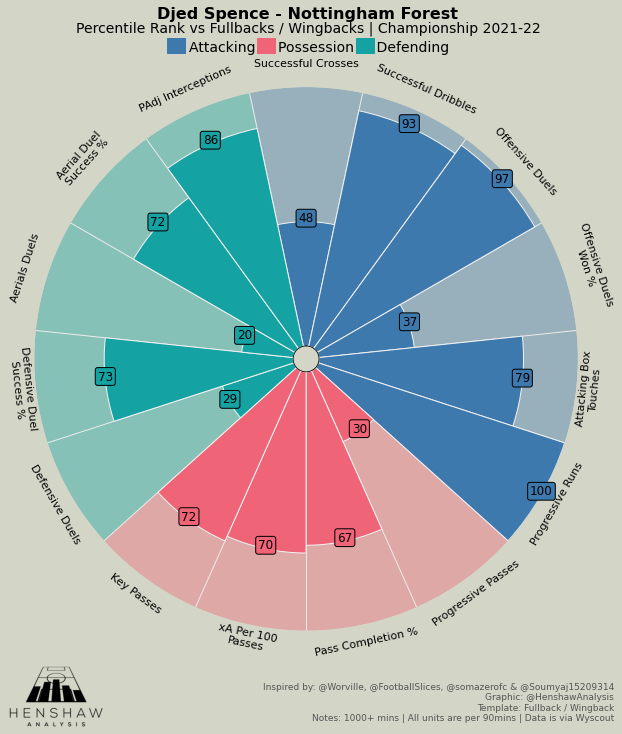

In [139]:
# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(10, 10),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.975, "Djed Spence - Nottingham Forest", size=16, fontweight='bold',
    ha="center", color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.956,
    "Percentile Rank vs Fullbacks / Wingbacks | Championship 2021-22",
    size=14,
    ha="center", color="#000000"
)

# add credits
CREDIT_1 = "Inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"
CREDIT_2 = "Graphic: @HenshawAnalysis"
CREDIT_3 = "Template: Fullback / Wingback"
CREDIT_4 = "Notes: 1000+ mins | All units are per 90mins | Data is via Wyscout"

fig.text(
    0.94, 0.000, f"{CREDIT_1}\n{CREDIT_2}\n{CREDIT_3}\n{CREDIT_4}", size=9,
    color="#545454",
    ha="right"
)

# add text
fig.text(
    0.35, 0.93, "Attacking     Possession     Defending", size=14,
    color="#000000"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.32, 0.9275), 0.025, 0.021, fill=True, color="#3e79ad",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.445, 0.9275), 0.025, 0.021, fill=True, color="#EF6577",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.582, 0.9275), 0.025, 0.021, fill=True, color="#14A2A2",
        transform=fig.transFigure, figure=fig
    ),
])

im2 = imageio.imread('HenshawAnalysis_Logo.png')

# add image
ax_image = add_image(
    im2, fig, left=0.1, bottom=-0.03, width=0.13, height=0.127
)   # these values might differ when you are plotting

plt.show()